In [3]:
# mnist_show.py

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5


print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)

# os.pardir는 상위 디렉토리를 의미합니다 (Unix에서는 "..", Windows에서도 동일)
# sys.path는 Python이 모듈을 찾을 때 검색하는 디렉토리 목록입니다
# append()로 이 경로를 sys.path에 추가함으로써, Python은 상위 디렉토리에 있는 모듈도 import할 수 있게 됩니다
# Python은 스크립트를 실행할 때, 해당 스크립트가 있는 디렉터리를 sys.path의 첫 번째 항목으로 추가하여 임포트 경로의 기준점으로 삼습니다.(전체집합 적 사고 해보기 필수!)
# 일부 IDE(예: PyCharm, VS Code)는 프로젝트의 루트 디렉터리를 자동으로 Python 경로에 추가합니다. 
# 따라서, IDE 내에서 스크립트를 실행할 경우 project 디렉터리가 자동으로 경로에 포함될 수 있습니다.
# 2차원 배열을 1차원으로 변환하는 것(flatten=True)은, 단순히 행(row)을 한 줄씩 이어붙이는 것입니다.

5
(784,)
(28, 28)


In [1]:
# neuralnet_mnist.py

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("files/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1     # np.dot(x, W1)는 의미를 지니는 행렬 곱셈이다! 어떤의미?--> 신경망에서의 가중치와 입력값의 곱과 합과 정확히 일치!
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)     
    
    return y


x, t = get_data()
print(x[0].shape)
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

# print(x_train.shape)  # (60000, 784)
# print(t_train.shape)  # (60000,)
# print(x_test.shape)   # (10000, 784)
# print(t_test.shape)   # (10000,)
# network는 학습된 신경망의 가중치(weights)와 편향(biases)을 포함하는 딕셔너리입니다. 
#network = {
#    'W1': np.array(...),  # 첫 번째 층의 가중치 (784, 50)
#    'W2': np.array(...),  # 두 번째 층의 가중치 (50, 100)
#    'W3': np.array(...),  # 세 번째 층의 가중치 (100, 10)
#    'b1': np.array(...),  # 첫 번째 층의 편향 (50,)
#    'b2': np.array(...),  # 두 번째 층의 편향 (100,)
#    'b3': np.array(...),  # 세 번째 층의 편향 (10,)
#}


# 첫 번째 층 (입력층 → 첫 번째 은닉층)
#print(network['W1'].shape)  # (784, 50)
#print(network['b1'].shape)  # (50,)
# - 입력층(784 뉴런)에서 첫 번째 은닉층(50 뉴런)으로의 연결

# 두 번째 층 (첫 번째 은닉층 → 두 번째 은닉층)
#print(network['W2'].shape)  # (50, 100)
#print(network['b2'].shape)  # (100,)
# - 첫 번째 은닉층(50 뉴런)에서 두 번째 은닉층(100 뉴런)으로의 연결

# 세 번째 층 (두 번째 은닉층 → 출력층)
#print(network['W3'].shape)  # (100, 10)
#print(network['b3'].shape)  # (10,)
# - 두 번째 은닉층(100 뉴런)에서 출력층(10 뉴런)으로의 연결'''

# 규칙 1: 두 인자가 모두 1차원 배열인 경우
#v1 = np.array([1, 2, 3])  # (3,)
#v2 = np.array([4, 5, 6])  # (3,)
#result = np.dot(v1, v2)   # 내적(dot product): 1*4 + 2*5 + 3*6

# 규칙 2: 첫 번째 인자가 1차원이고 두 번째 인자가 2차원인 경우
#v = np.array([1, 2, 3])     # (3,)
#M = np.array([[1, 2],       # (3, 2)
#              [3, 4],
#              [5, 6]])
#result = np.dot(v, M)       # v는 자동으로 (1, 3)으로 처리됨

# 규칙 3: 첫 번째 인자가 2차원이고 두 번째 인자가 1차원인 경우
#M = np.array([[1, 2, 3],    # (2, 3)
#              [4, 5, 6]])
#v = np.array([1, 2, 3])     # (3,)
#result = np.dot(M, v)       # v는 자동으로 (3, 1)으로 처리됨"""
# when numpy 배열 덧셈시!

# 규칙 1: 두 배열의 차원수가 다르면 낮은 차원 배열의 형상 앞에 1을 추가
# 규칙 2: 두 배열의 모양 튜플의 원소가 서로
#        - 같거나
#        - 둘 중 하나가 1이면 
#        브로드캐스팅 가능
# 브로드캐스팅에서는 항상 1보다 큰 수로 차원을 확장하게 됩니다.
# np.dot은 1차원 또는 2차원 배열에 주로 사용됩니다. 그니까 위 규칙내용만 살펴도 ok 장땡!
# 1단계: np.dot(x, W1)
# - x는 내부적으로 (1, 784)로 처리됨
# - (1, 784) × (784, 50) = (1, 50)

# 2단계: + b1
# - b1(50,)는 브로드캐스팅으로 (1, 50)로 처리됨
# - (1, 50) + (1, 50) = (1, 50)

# 3단계: 최종 결과
# - (1, 50) 결과는 (50,)으로 스퀴즈(squeeze)됨
# - 따라서 a1.shape = (50,)'''
# Numpy에서는 크기가 1인 차원(예: (1, 50)이 (50,)으로 바뀌는 것)을 자동으로 줄여주는 "스퀴즈(squeeze)" 처리를 특정 상황에서 암묵적으로 수행합니다.

(784,)
Accuracy:0.9352


In [ ]:
# neuralnet_mnist_batch.py

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("files/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1     # np.dot(x, W1)는 의미를 지니는 행렬 곱셈이다! 어떤의미?--> 신경망에서의 가중치와 입력값의 곱과 합과 정확히 일치!(100개 씩 배치처리 중!)
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)
    
    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]

    y_batch = predict(network, x_batch)
  
    p = np.argmax(y_batch, axis=1)
    # p.shape = (100,)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

# (True는 1, False는 0으로 계산) 
# [True, False, True, True, False] 와 같이 나옴!(50행!)
# 행렬(벡터)의 각 원소에 sigmoid or softmax 가 적용되는 것이다!
# 가장 최근의 행렬 곱셈 후의 행렬의 각 원소의 본질적 의미는 가중합 또는 h(가중합) (h는 활성화 함수) 그 자체이고 그 가중합 or h(가중합)의 주인은 행렬의 shape 과 행과 열의 의미로 판단한다!(층까지 주인 구체화는 불가능!)
# 일반적인 행렬의 곱셈에서 첫번째 행렬의 x번째 행 두번째 행렬의 y번째 열의 내적(곱셈)은 x,y 에 배치된다!(곱셈 후의 행렬의 원소를 모두 채워보는 사고작업 필수!)--> 57행이 증명됨!--> (1,2에 대한 답!)
# 문제점? 층들간의 관계를 인식하는 것!(자꾸 과거의 존재정보를 인식하는 것이 문제!) 순간에만 충실하면 된다!
# 네, 신경망에서 "번째"라는 순서와 행 또는 열을 나타내는 숫자는 1:1로 항등 관계에 놓여 있습니다.
#1."행렬 곱셈을 선택했기 때문에 항등적 관계가 생겼다"라고 볼 수 있습니다.
#2."행렬 곱셈을 선택했기 때문에 인덱스가 전파된다"라고 볼 수 있습니다.
# 인덱스가 전파된다의 의미?--> 데이터와 뉴런의 고유 순서가 신경망의 각 층에서 정확히 유지됨.
# 궁금한 건 모두 행렬의 곱셈을 시물레이션 해보면 풀린다 in 신경망
# 사고순서?--> 58행의 사고를 각 층 사이에 대해 한다!(with 60행!)&('번째'와 행과 열의 의미(데이터,뉴런)를 인식한 상태로!)--> 모든 층에서 57행이 성립함을 보인다!--> 이를 통해 1,2를 보인다!--> 끝!

Accuracy:0.9352


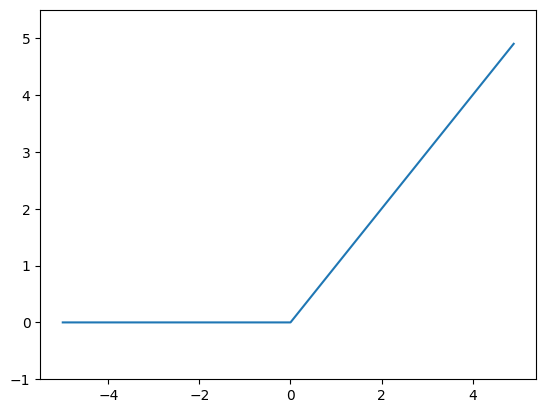

In [ ]:
# relu.py

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()


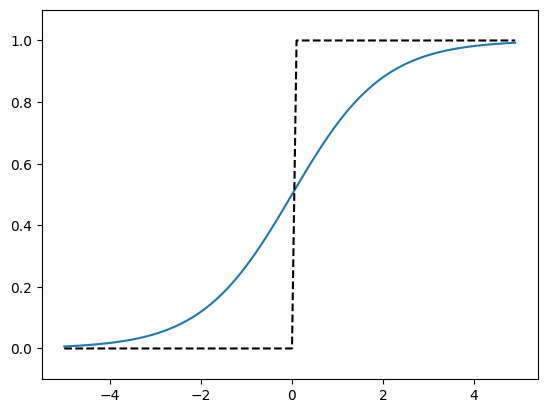

In [1]:
# sig_step_compare.py

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()


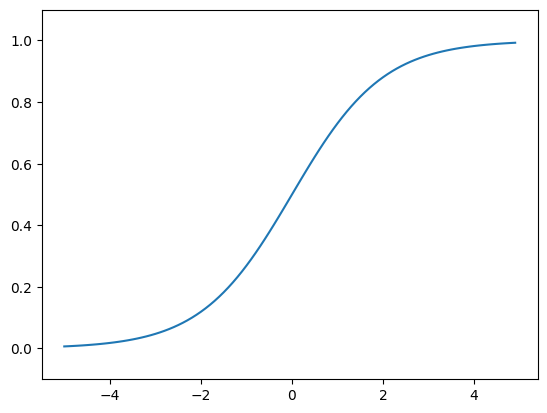

In [4]:
# sigmoid.py

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()


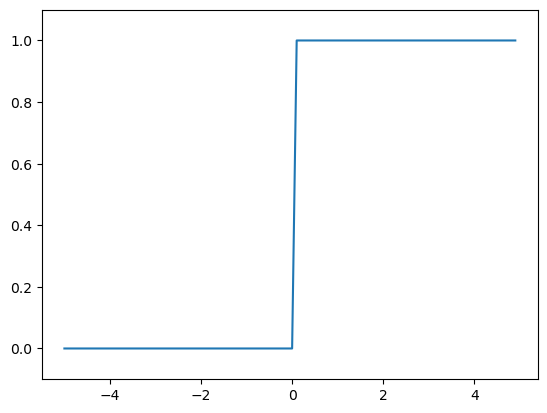

In [24]:
# step_function.py

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()
